In [1]:
import numpy as np
import pandas as pd

from data_process import *
from data_split import *

In [2]:
def get_specific_data(root_path, by_txt=True, activity='dig', dis='1.0', num=None):
    """具体取出某距离上发生的某事件信号
    """
    data_root, txt_root = root_path + '/data', root_path + '/txt'
    total_activity = []
    file_name_list = [name for name in os.listdir(data_root) if activity in name and dis in name]

    for file_name in file_name_list:
        file_path = data_root + '/' + file_name
        dataXYZ = pd.read_csv(file_path, header= 0)
        data_x, data_y, data_z = list(dataXYZ.iloc[:,0]), list(dataXYZ.iloc[:, 1]), list(dataXYZ.iloc[:, 2])
        base_value = cal_base_value(dataXYZ, 32, 16, 500)
        
        if by_txt: # 获取 activity_list
            txt_path = txt_root + '/' + file_name[:-3] + 'txt'
            with open(txt_path, 'r') as f:
                activity_list = f.readlines()
            activity_list = [int(activity[:-1]) for activity in activity_list]
        else:
            activity_list = [int(np.mean(idx)) for idx in activitySplit(dataXYZ, 32, 16, 500)]

        noise_list = [index-128 for index in activity_list]
        activity_list = [{'data_x': np.array(extract_data_from_center(data_x, center, base_value[0])),
                        'data_y': np.array(extract_data_from_center(data_y, center, base_value[1])),
                        'data_z': np.array(extract_data_from_center(data_z, center, base_value[2])),
                        'noise_x': np.array(extract_data_from_center(data_x, center-128, base_value[0])),
                        'noise_y': np.array(extract_data_from_center(data_y, center-128, base_value[1])),
                        'noise_z': np.array(extract_data_from_center(data_z, center-128, base_value[2])),
                        'label': get_activity_label(file_name), 'file_name': file_name, 'base_value':base_value,
                        'angle': cal_angles(base_value), 'area': get_area_label(data_root)} 
                        for center in activity_list]
        
        total_activity += activity_list

    if num is not None:
        return random.choices(total_activity, k=num)
    else:
        return total_activity

In [17]:
root = 'E:/研一/嗑盐/土壤扰动/dataset/zwy3'
# zwy2_dig = get_specific_data(root, by_txt=False, activity='dig', dis='5.0')
zwy3_dig = get_specific_data(root, by_txt=False, dis='md', num=10)
zwy3_dig_xyz = [np.sqrt(item['data_z']**2 + item['data_x']**2 + item['data_y']**2) for item in zwy3_dig]

In [18]:
zwy3_dig_xyz = [np.sqrt(item['data_z']**2 + item['data_x']**2 + item['data_y']**2) for item in zwy3_dig]

In [22]:
zwy3_dig_xyz2 = [np.sqrt((item['data_z']-item['base_value'][2])**2 + \
    (item['data_x']-item['base_value'][0])**2 + \
        (item['data_y']-item['base_value'][1])**2) for item in zwy3_dig]



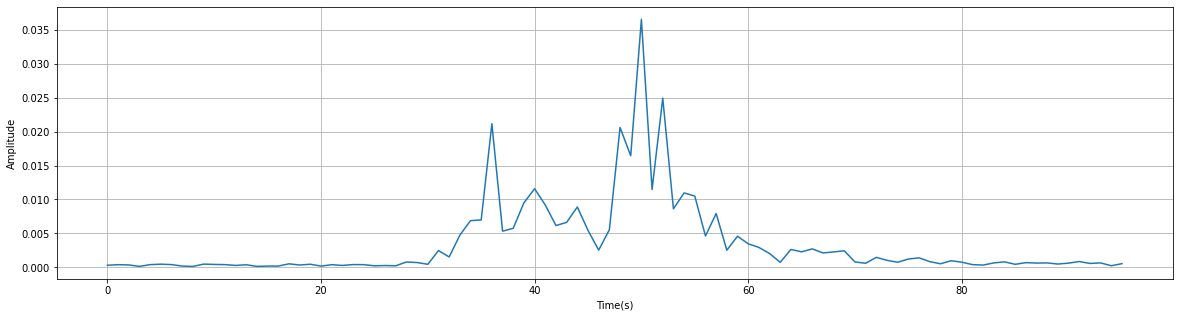

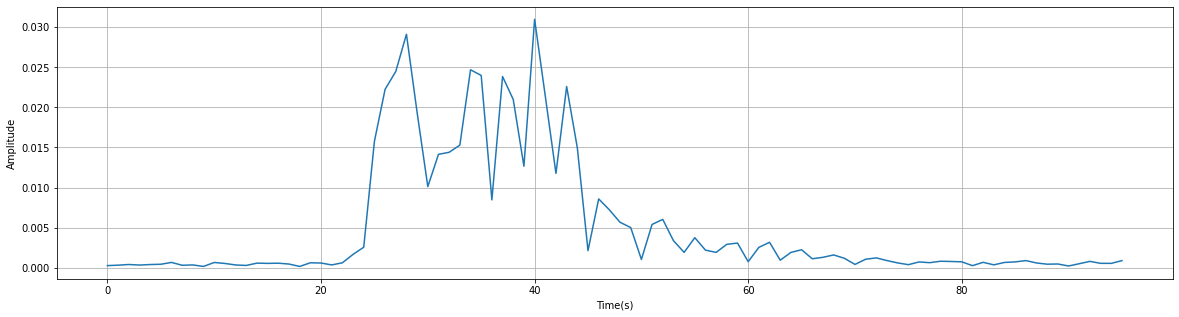

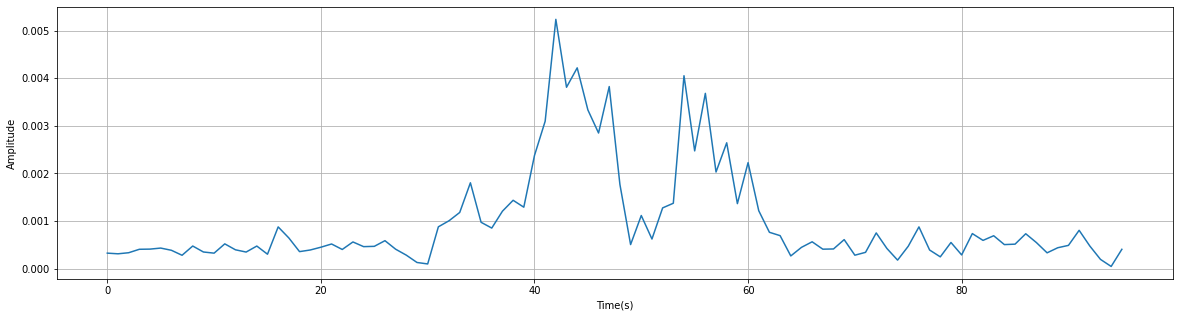

In [24]:
plot_time(zwy3_dig_xyz2[0])
plot_time(zwy3_dig_xyz2[1])
plot_time(zwy3_dig_xyz2[2])

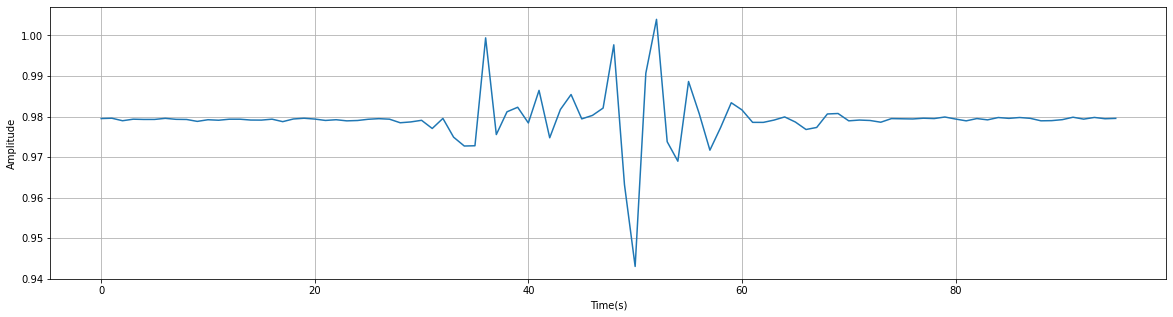

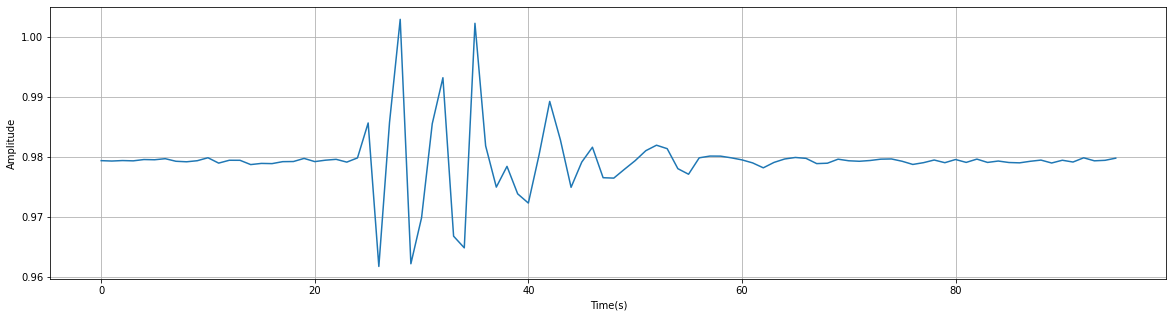

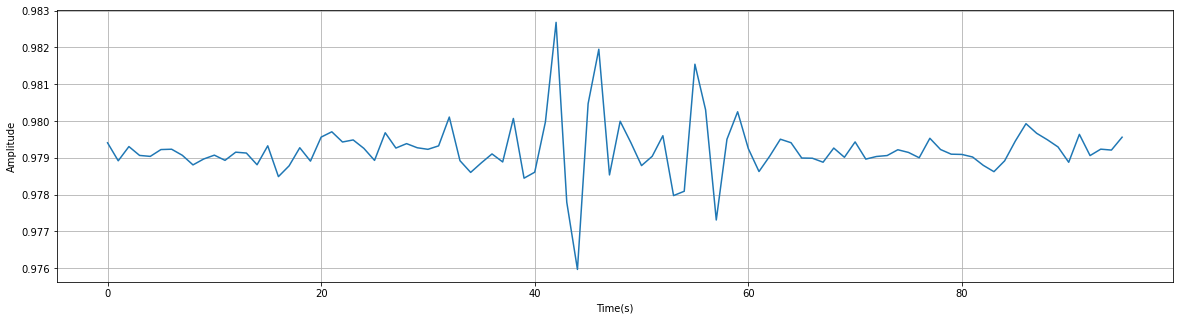

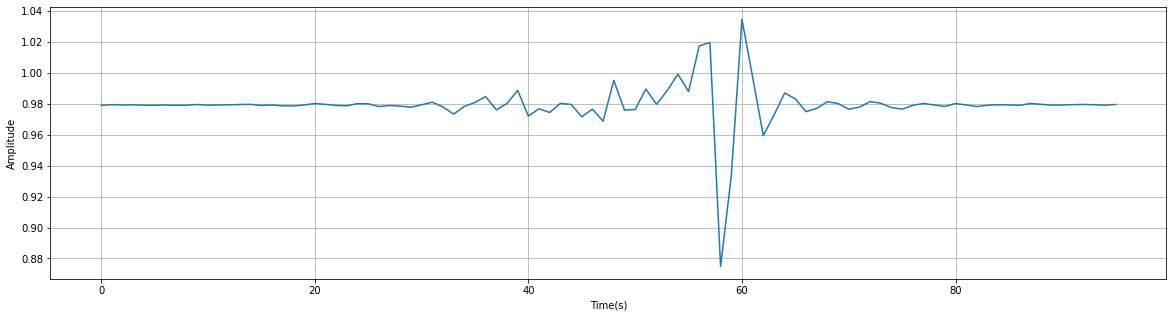

In [21]:
plot_time(zwy3_dig_xyz[0])
plot_time(zwy3_dig_xyz[1])
plot_time(zwy3_dig_xyz[2])
plot_time(zwy3_dig_xyz[3])